In [1]:
import numpy as np
import sklearn
import joblib
from multiprocessing import Pool, Lock
import time

# setup for jupyter notebook
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [26]:
# create simulation data
num_heaters = 200

zero_center = 0.9
one_center = 1.1

X1 = np.random.normal(one_center, size=(700 * num_heaters // 2, 2450)).astype(np.float32)
X2 = np.random.normal(zero_center, size=(700 * num_heaters // 2, 2450)).astype(np.float32)
X = np.concatenate([X1, X2], axis=0)
y = np.concatenate([np.ones(700 * num_heaters // 2, dtype=np.int32), np.zeros(700 * num_heaters // 2, dtype=np.int32)])

test_X = np.random.normal((zero_center + one_center) / 2.0, size=(1000, 2450)).astype(np.float32)
test_X0 = np.random.normal(zero_center, size=(1000, 2450)).astype(np.float32)
test_X1 = np.random.normal(one_center, size=(1000, 2450)).astype(np.float32)

In [31]:
# sklearn SVC
from sklearn.svm import SVC

tic = time.time()
svc = SVC(probability=False, class_weight={0:1, 1:10}, verbose=True, max_iter=1000)
svc.fit(X, y)
toc = time.time()
print('%fs' % (toc - tic))

[LibSVM]763.381000s


C:\ProgramData\Anaconda3\envs\py27\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [22]:
def show_test(classifier):
	print(float(sum(classifier.predict(test_X))) / classifier.predict(test_X).shape[0])
	print(float(sum(classifier.predict(test_X0))) / classifier.predict(test_X0).shape[0])
	print(float(sum(classifier.predict(test_X1))) / classifier.predict(test_X1).shape[0])

def show_acc(classifier):
	print("class 0 acc: ", float(sum(classifier.predict(test_X0) == 0)) / classifier.predict(test_X0).shape[0])
	print("class 1 acc: ", float(sum(classifier.predict(test_X1) == 1)) / classifier.predict(test_X1).shape[0])

In [32]:
show_test(svc)
show_acc(svc)

0.469
0.0
1.0
('class 0 acc: ', 1.0)
('class 1 acc: ', 1.0)


In [29]:
# sklearn LinearSVC
from sklearn.svm import LinearSVC

tic = time.time()
linear_svc = LinearSVC(class_weight={0:1, 1:10}, verbose=True, max_iter=1000)
linear_svc.fit(X, y)
toc = time.time()
print('%fs' % (toc - tic))

[LibLinear]259.485000s


In [30]:
show_test(linear_svc)
show_acc(linear_svc)

0.48
0.0
1.0
('class 0 acc: ', 1.0)
('class 1 acc: ', 1.0)


iteration 0 / 2000: loss 1.056797
iteration 100 / 2000: loss 1.004554
iteration 200 / 2000: loss 0.957793
iteration 300 / 2000: loss 0.911509
iteration 400 / 2000: loss 0.865394
iteration 500 / 2000: loss 0.822656
iteration 600 / 2000: loss 0.781809
iteration 700 / 2000: loss 0.744713
iteration 800 / 2000: loss 0.705665
iteration 900 / 2000: loss 0.668728
iteration 1000 / 2000: loss 0.631938
iteration 1100 / 2000: loss 0.601613
iteration 1200 / 2000: loss 0.567996
iteration 1300 / 2000: loss 0.538331
iteration 1400 / 2000: loss 0.506014
iteration 1500 / 2000: loss 0.478984
iteration 1600 / 2000: loss 0.444045
iteration 1700 / 2000: loss 0.425551
iteration 1800 / 2000: loss 0.403975
iteration 1900 / 2000: loss 0.379378
55.283000s


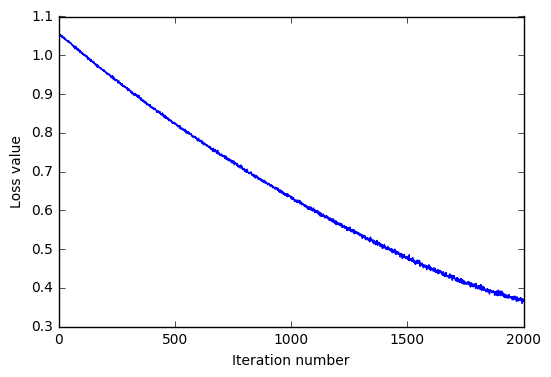

In [27]:
# my LinearSVC with mini-batch SGD
from classifier_sk import LinearSVM

tic = time.time()
svc2 = LinearSVM()
loss_hist = svc2.fit(X, y, learning_rate=1e-5, reg=1e1, num_iters=2000,
            batch_size=2000, verbose=True)
toc = time.time()
print('%fs' % (toc - tic))

# plot loss vs iter

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [28]:
show_test(svc2)
show_acc(svc2)

0.525
0.0
1.0
('class 0 acc: ', 1.0)
('class 1 acc: ', 1.0)
